In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import networkx as nx
import random
from tqdm import tqdm

# data


In [2]:
df_post = pd.read_csv('/home/pelle/Master_Thesis/data/raw/wallstreetbets/submissions_pmaw_2016-2021_wsb.csv')
df_post = df_post[df_post.author != '[deleted]']
df_post = df_post[df_post.author != 'AutoModerator']
df_post = df_post[df_post.author != 'WSBMod']
df_post['awarded'] = np.where(df_post['award_count'] > 0, 1, 0)
df_post.created_utc = pd.to_datetime(df_post.created_utc)

In [4]:
df_post.head()

,id,author,created_utc,title,selftext,score,subreddit_subscribers,num_comments,award_count,awarded
2,66nuz5,busterbluthOT,2017-04-21 08:04:16,Which one of you was this?,NaN,0.0,NaN,4.0,0.0,0
4,66nrup,tulipBulbs,2017-04-21 07:36:32,You heard it here first,https://www.washingtonpost.com/world/europe/th...,0.0,NaN,6.0,0.0,0
5,66nptj,-RiskManagement-,2017-04-21 07:19:28,I think this might be helpful for everyone,NaN,1.0,NaN,5.0,0.0,0
7,66nnsb,xeno211,2017-04-21 07:04:32,Algorithm and ml,Hey do any of you guys use machine learning or...,0.0,NaN,16.0,0.0,0
8,66nmz6,rentmypie,2017-04-21 06:58:08,chances of a $TSLA short squeeze? 24.6% shorte...,NaN,0.0,NaN,8.0,0.0,0


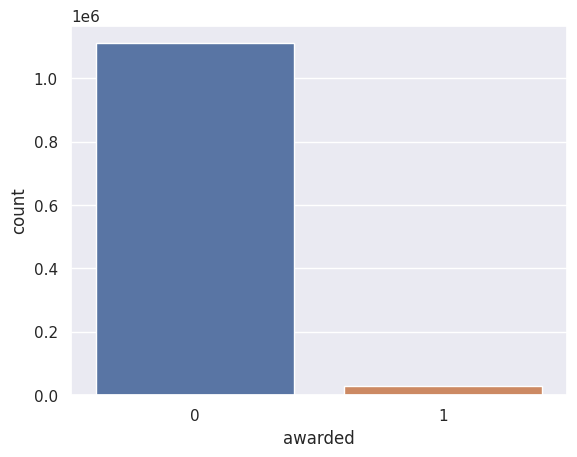

In [3]:
sns.countplot(x='awarded', data=df_post)
plt.show()

In [3]:
# previouse_awarded = 0
# previouse_not_awarded = 0
# for index, row in tqdm(df_post[df_post['awarded']==1].iterrows()):
#     date = row['created_utc']
#     author = row['author']

#     temp_df=df_post.loc[(df_post['created_utc'] < date) & (df_post['author'] == author)] 

#     if len(temp_df) > 0:
#         if temp_df['awarded'].sum() > 0:
#             previouse_awarded += 1
#         else:
#             previouse_not_awarded += 1


# # ['Previous awarded', 'Previous not awarded']
# # [8814, 12113]

In [12]:
previouse_awarded, previouse_not_awarded = 8814, 12113

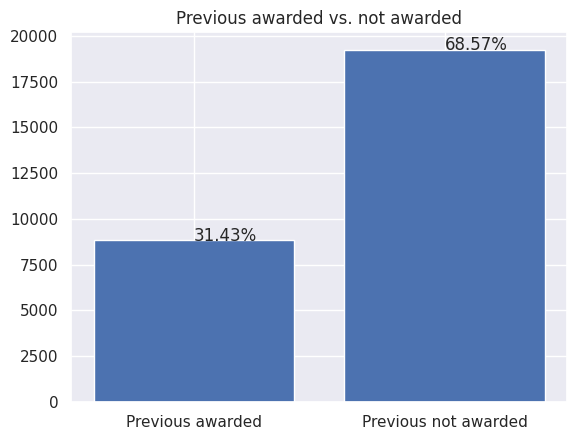

In [13]:
# plot the data
plt.bar(['Previous awarded', 'Previous not awarded'], [previouse_awarded, previouse_not_awarded+7120])
plt.title('Previous awarded vs. not awarded')
# add % on top of each bar
for index, value in enumerate([previouse_awarded, previouse_not_awarded+7120]):
    plt.text(index, value, str(round(value/len(df_post[df_post['awarded']==1])*100, 2)) + '%')
plt.show()

In [14]:
P_awarded = len(df_post[df_post['awarded']==1])/df_post.shape[0]
P_awarded_given_prev_awarded = 0.31

In [15]:
# how many of the authors have an award
df_post[df_post['awarded']==1]['author'].nunique()
df_post[df_post['awarded']==1]['author'].nunique()/df_post['author'].nunique()

0.036890573473269385

In [35]:
authors = df_post['author'].unique()
award_count_authors = df_post[df_post['award_count']!=0]['author'].unique()

# top 10 % award_count authors
def top_n_percent_award_count(n):
    top_10_percent = int(len(award_count_authors)*n)
    top_10_percent_authors = df_post[df_post['award_count']!=0].groupby('author')['award_count'].sum().sort_values(ascending=False).head(top_10_percent).index

    return top_10_percent_authors

perc=np.arange(0, 1, 0.01)

top_sums = []

for p in tqdm(perc):
    top = top_n_percent_award_count(p)
    df_post_top = df_post[df_post['author'].isin(top)]
    top_sums.append(df_post_top.award_count.sum())

100%|██████████| 100/100 [00:07<00:00, 12.89it/s]


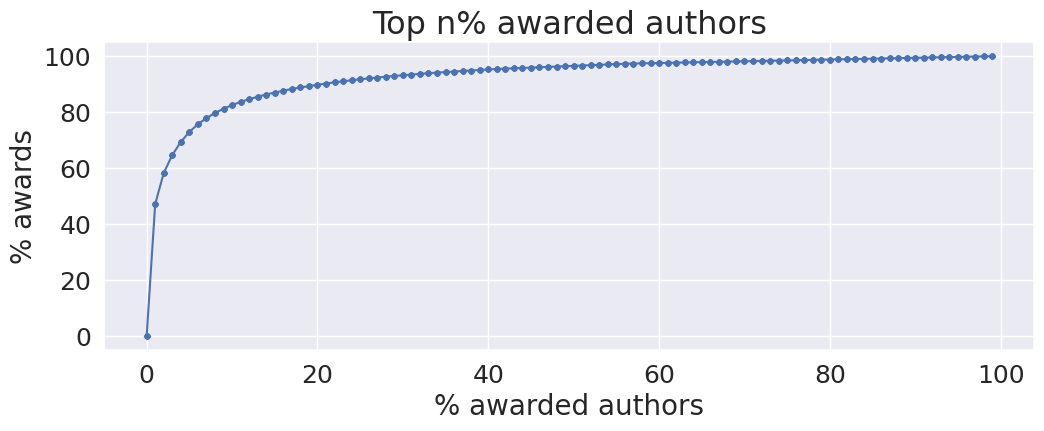

Top 1% of the awarded authors have awarded 47 % of the awards
Top 2% of the awarded authors have awarded 58 % of the awards


In [36]:
plt.figure(figsize=(12, 4))
sns.scatterplot(y=(top_sums/df_post['award_count'].sum())*100, x=perc*100, alpha=1, s=30)
sns.lineplot(y=(top_sums/df_post['award_count'].sum())*100, x=perc*100, alpha=1)
plt.title('Top n% awarded authors', fontsize=23)
plt.xlabel('% awarded authors', fontsize=20)
plt.ylabel('% awards', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig('top_n_percent_awarded_authors.png', dpi=250, bbox_inches='tight')
plt.show()

print("Top 1% of the awarded authors have awarded", round((top_sums[1]/df_post['award_count'].sum())*100), "% of the awards")
print("Top 2% of the awarded authors have awarded", round((top_sums[2]/df_post['award_count'].sum())*100), "% of the awards")

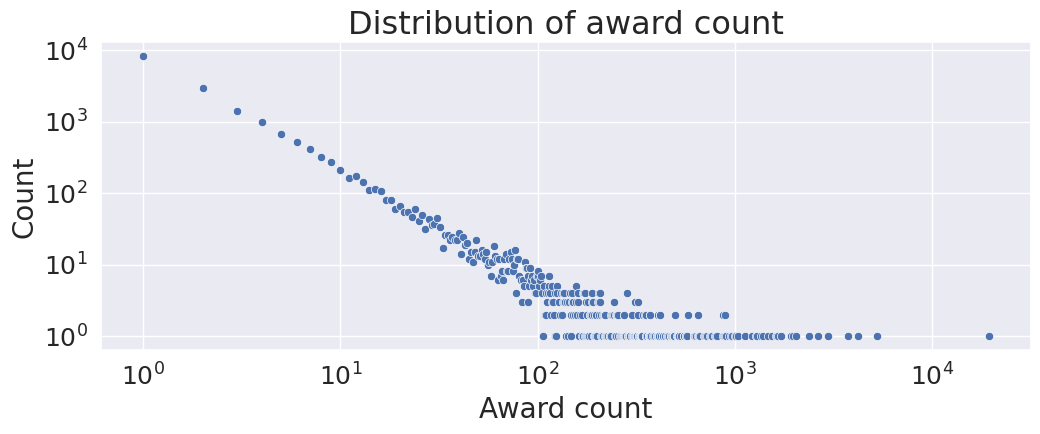

In [33]:
award_count=df_post.groupby('author')['award_count'].sum()
award_count = award_count[award_count > 0.1]
award_count = award_count.sort_values(ascending=False)
award_count = award_count.groupby(award_count).count()

# plot distribution with line of award_count smoothed
plt.figure(figsize=(12, 4))
sns.scatterplot(award_count, alpha=1)
plt.title('Distribution of award count', fontsize=23)
plt.xlabel('Award count', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

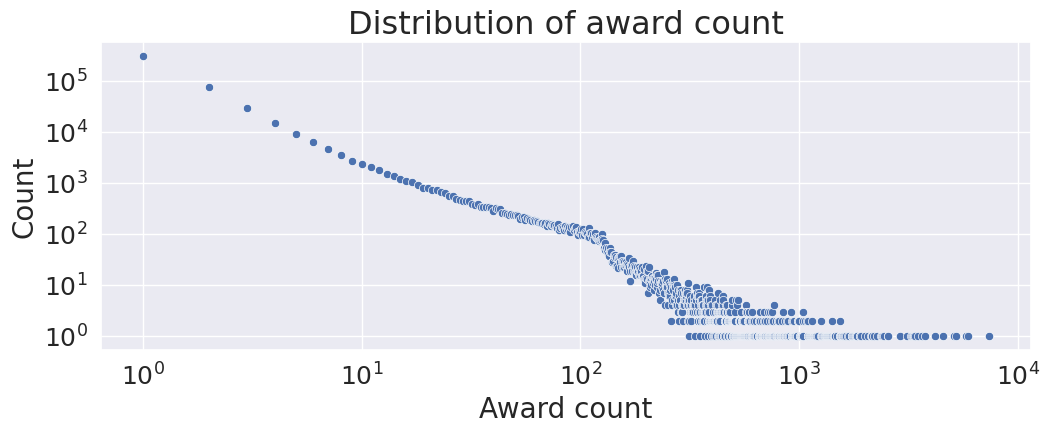

In [40]:
award_count=df_post.groupby('author')['score'].sum()
award_count = award_count[award_count > 0.1]
award_count = award_count.sort_values(ascending=False)
award_count = award_count.groupby(award_count).count()

# plot distribution with line of award_count smoothed
plt.figure(figsize=(12, 4))
sns.scatterplot(award_count, alpha=1)
plt.title('Distribution of award count', fontsize=23)
plt.xlabel('Award count', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')
plt.xscale('log')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [225]:
# middle date of df_post.created_utc
mid=df_post['created_utc'].max() - (df_post['created_utc'].max() - df_post['created_utc'].min())/2

In [226]:
# middle date of df_post.created_utc
periode=df_post['created_utc'].max() - df_post['created_utc'].min()
periode

Timedelta('1775 days 05:28:32')

In [227]:
# diffrent colors
colors = ['red', 'blue', 'green', 'orange']

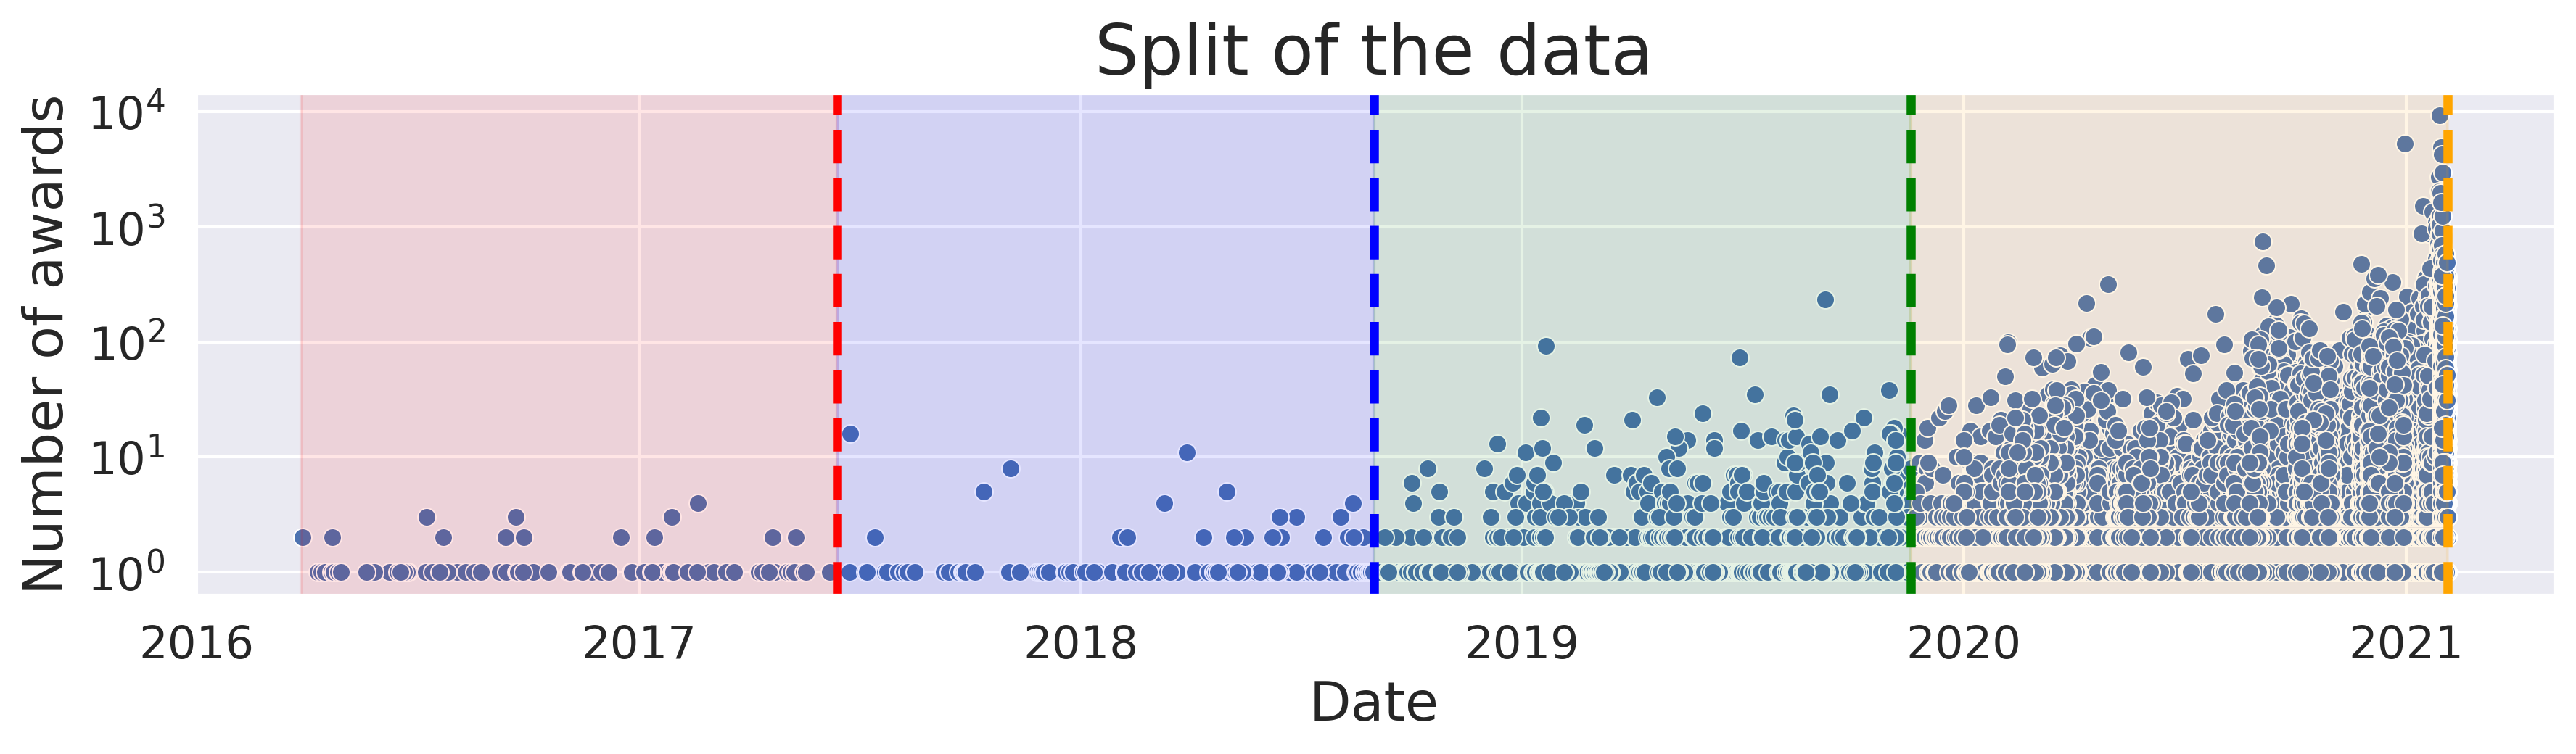

In [228]:
plt.figure(figsize=(14,3),dpi=300)
sns.scatterplot(data=df_post,y='award_count', x='created_utc', alpha=1)

plt.title('Split of the data', fontsize=23)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Number of awards', fontsize=18)
split_dates = []
for p in range(1, 5):
    split = (periode/4)*p
    plt.axvline(df_post.created_utc.min()+split, alpha=1, color=colors[p-1], linestyle='--',linewidth=3, label='Split')
    split_dates.append(df_post.created_utc.min()+split)

# color a section of the plot behind the scatterplot
plt.axvspan(df_post.created_utc.min(), split_dates[0], alpha=0.1, color='red')
plt.axvspan(split_dates[0], split_dates[1], alpha=0.1, color='blue')
plt.axvspan(split_dates[1], split_dates[2], alpha=0.1, color='green')
plt.axvspan(split_dates[2], split_dates[3], alpha=0.1, color='orange')

plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('split_of_the_data_for_rich.png', dpi=250, bbox_inches='tight')
plt.show()

Date: 2016-03-27 02:12:16
Date: 2017-06-13 21:34:24
Number of posts: 41542


100%|██████████| 101/101 [00:00<00:00, 425.15it/s]


Top 1% of the awarded authors have awarded 0.0 % of the awards
Top 2% of the awarded authors have awarded 8 % of the awards
Date: 2017-06-13 21:34:24
Date: 2018-08-31 16:56:32
Number of posts: 76564


100%|██████████| 101/101 [00:00<00:00, 290.53it/s]


Top 1% of the awarded authors have awarded 11.415525114155251 % of the awards
Top 2% of the awarded authors have awarded 19 % of the awards
Date: 2018-08-31 16:56:32
Date: 2019-11-18 12:18:40
Number of posts: 93203


100%|██████████| 101/101 [00:00<00:00, 178.43it/s]


Top 1% of the awarded authors have awarded 34.37931034482759 % of the awards
Top 2% of the awarded authors have awarded 42 % of the awards
Date: 2019-11-18 12:18:40
Date: 2021-02-04 07:40:48
Number of posts: 927034


100%|██████████| 101/101 [00:06<00:00, 14.88it/s]


Top 1% of the awarded authors have awarded 46.75260945105373 % of the awards
Top 2% of the awarded authors have awarded 58 % of the awards


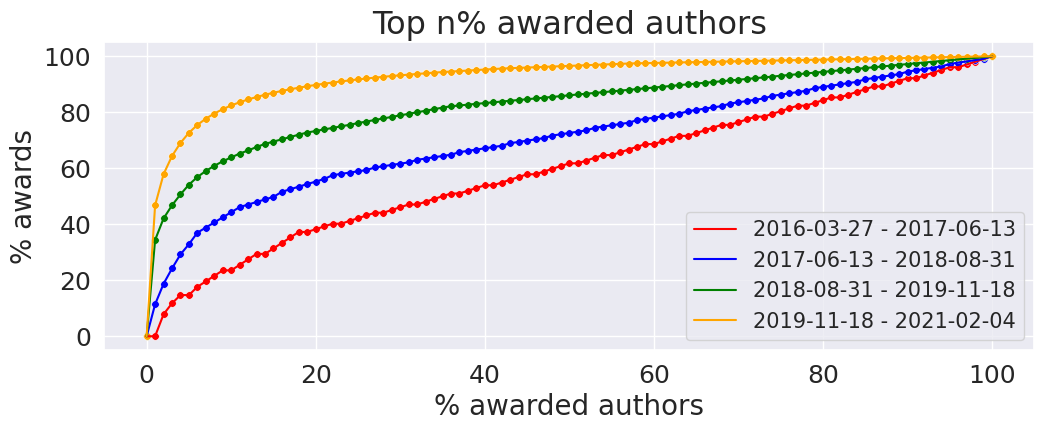

In [147]:
plt.figure(figsize=(12, 4))
colors = ['red', 'blue', 'green', 'orange']
date_init = df_post['created_utc'].min()
for i, split_date in enumerate(split_dates):
    df_post_new = df_post[(df_post['created_utc'] < split_date) & (df_post['created_utc'] > date_init)]
    
    print('Date: ' + str(date_init))
    print('Date: ' + str(split_date))
    print('Number of posts: ' + str(len(df_post_new)))


    award_count_authors = df_post_new[df_post_new['award_count']!=0]['author'].unique()
    # top n % award_count authors
    def top_n_percent_award_count(n):
        top_n_percent = int(len(award_count_authors)*n)
        top_n_percent_authors = df_post_new[df_post_new['award_count']!=0].groupby('author')['award_count'].sum().sort_values(ascending=False).head(top_n_percent).index

        return top_n_percent_authors

    perc=np.arange(0.0, 1.01, 0.01)

    top_sums = []

    for p in tqdm(perc):
        top = top_n_percent_award_count(p)
        df_post_new_top = df_post_new[df_post_new['author'].isin(top)]

        top_sums.append(df_post_new_top.award_count.sum())

    sns.scatterplot(y=(top_sums/df_post_new['award_count'].sum())*100, x=perc*100, alpha=1, s=30,color=colors[i])
    sns.lineplot(y=(top_sums/df_post_new['award_count'].sum())*100, x=perc*100, alpha=1,color=colors[i], label=str(date_init)[:10] + ' - ' + str(split_date)[:10])
    plt.title('Top n% awarded authors', fontsize=23)
    plt.xlabel('% awarded authors', fontsize=20)
    plt.ylabel('% awards', fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.savefig('top_n_percent_awarded_authors.png', dpi=250, bbox_inches='tight')
    # legend 

    print("Top 1% of the awarded authors have awarded", (top_sums[1]/df_post_new['award_count'].sum())*100, "% of the awards")
    print("Top 2% of the awarded authors have awarded", round((top_sums[2]/df_post_new['award_count'].sum())*100), "% of the awards")
    date_init = split_date
plt.legend(fontsize=15, loc='lower right')
plt.savefig('top_n_percent_awarded_authors_by_date.png', dpi=250, bbox_inches='tight')
plt.show()

# Test

1) Consider a sequence of posts by one user (here N means not-awarded and A means awarded) 

NNNNNANNNNANNNANNANA

2) Count the cumulative number of awards: 
00000111112222333445

3) Compute the probability to be awarded, given that you already have k awards (this can just be done by counting the number of occurrences of each k in your sequence above): 
- P(A|0) = 1/6
- P(A|1) = 1/5
- P(A|2) = 1/4
- P(A|3) = 1/2
…

4) Repeat the steps above for many users and plot the average P(A|k) with error bars as a function of k. 
Here you can consider k from 0 to K and include only the users that have at least K awards. 
Basically we want to make sure that each data point in your plot is computed using the same set of users. 
You can also try to vary K.

I think the points above can be a starting point. Hopefully, we shall see that P(A|k) increases with k. 
Then, as usual, we can make sure that the result is not driven by something else by comparing with a null model.

1) Null model 1. One can shuffle the sequences in point (1), then repeat the measurement. This should result in a flat curve, so it just a sanity check. 
2) Null model 2. Consider an awarded post “p" posted on day “d" by a user with activity level “a”. Remove the award from “p" and assign it to another post “p2” posted on the same day “d” by a user with activity equal (or close to) “a”.  Do the same for all awarded posts, then recompute the steps above (1-4). This should account for the fact that over time there are more awards just because there are more and more users. 

## null model

In [3]:
def compute_prob_true_model(df, K):
    
    ###FIRST I FILTER AUTHORS WITH AT LEAST K AWARDS
    awards_per_author = df.groupby("author")["awarded"].sum().reset_index()
    filtered_authors = awards_per_author[(awards_per_author["awarded"]>K)]["author"].values
    filtered_post = df[df["author"].isin(filtered_authors)].copy()

    #THEN COMPUTE THE CUMSUM
    filtered_post["cumsum"] = filtered_post.sort_values(by='created_utc').groupby("author",group_keys=False)["awarded"].apply(pd.Series.cumsum)

    #THEN COMPUTE THE PROB
    df_prob = filtered_post.groupby(['author','cumsum'])["awarded"].count().reset_index()

    #THEN AVERAGE aND APPLY X--1/x
    df_prob_mean = df_prob[df_prob["cumsum"]<=K].groupby("cumsum")["awarded"].mean().apply(lambda x: 1/(x))
    return df_prob_mean

def compute_prob_true_null_model_1(df, K):
    
    ###FIRST I FILTER AUTHORS WITH AT LEAST K AWARDS
    awards_per_author = df.groupby("author")["awarded"].sum().reset_index()
    filtered_authors = awards_per_author[(awards_per_author["awarded"]>K)]["author"].values
    filtered_post = df[df["author"].isin(filtered_authors)].copy()
    
    # # Corupt the awarded column
    # for activity in filtered_post['activity'].unique():
    #     filtered_post.loc[filtered_post['activity']==activity, 'awarded_c'] = filtered_post[filtered_post['activity']==activity]['awarded'].sample(frac=1).values
    filtered_post['awarded_c'] = filtered_post.groupby('activity')['awarded'].apply(lambda x: x.sample(frac=1)).values

    #THEN COMPUTE THE CUMSUM
    filtered_post["cumsum"] = filtered_post.sort_values(by='created_utc').groupby("author",group_keys=False)["awarded_c"].apply(pd.Series.cumsum)


    #THEN COMPUTE THE PROB
    df_prob = filtered_post.groupby(['author','cumsum'])["awarded_c"].count().reset_index()

    #THEN AVERAGE aND APPLY X--1/x
    df_prob_mean = df_prob[df_prob["cumsum"]<=K].groupby("cumsum")["awarded_c"].mean().apply(lambda x: 1/(x))
    return df_prob_mean

def compute_prob_true_null_model_2(df, K):
    
    ###FIRST I FILTER AUTHORS WITH AT LEAST K AWARDS
    awards_per_author = df.groupby("author")["awarded"].sum().reset_index()
    filtered_authors = awards_per_author[(awards_per_author["awarded"]>K)]["author"].values
    filtered_post = df[df["author"].isin(filtered_authors)].copy()
    
    # # Corupt the awarded column
    # for activity in filtered_post['activity'].unique():
    #     filtered_post.loc[filtered_post['activity']==activity, 'awarded_c'] = filtered_post[filtered_post['activity']==activity]['awarded'].sample(frac=1).values
    filtered_post['awarded_c'] = filtered_post.groupby(['activity','date_day_year'])['awarded'].apply(lambda x: x.sample(frac=1)).values

    #THEN COMPUTE THE CUMSUM
    filtered_post["cumsum"] = filtered_post.sort_values(by='created_utc').groupby("author",group_keys=False)["awarded_c"].apply(pd.Series.cumsum)


    #THEN COMPUTE THE PROB
    df_prob = filtered_post.groupby(['author','cumsum'])["awarded_c"].count().reset_index()

    #THEN AVERAGE aND APPLY X--1/x
    df_prob_mean = df_prob[df_prob["cumsum"]<=K].groupby("cumsum")["awarded_c"].mean().apply(lambda x: 1/(x))
    return df_prob_mean

# activity for each author
df_post['activity'] = df_post.groupby('author')['author'].transform('count')
df_post['date_month_year'] = df_post['created_utc'].apply(lambda x: str(x)[:7])
df_post['date_day_year'] = df_post['created_utc'].apply(lambda x: str(x)[:10])

kk = 10
df_prob_mean = compute_prob_true_model(df_post, kk)
df_prob_mean_null_1 = compute_prob_true_null_model_1(df_post, kk)
df_prob_mean_null_2 = compute_prob_true_null_model_2(df_post, kk)

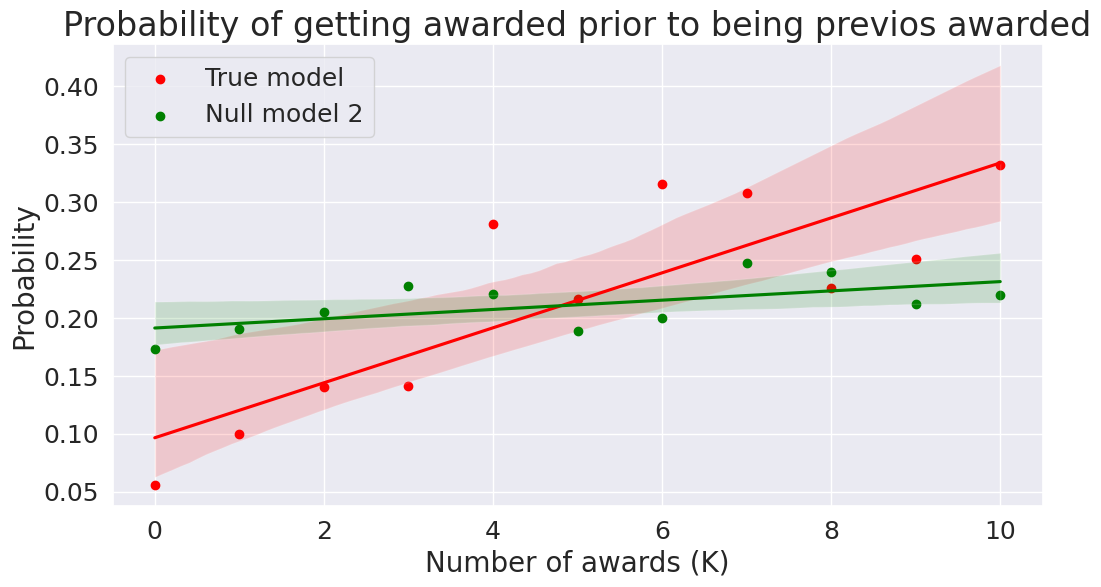

In [26]:
plt.figure(figsize=(12, 6))
plt.scatter(y=df_prob_mean, x=df_prob_mean.index, label='True model',color='red')
sns.regplot(y=df_prob_mean, x=df_prob_mean.index, data=df_prob_mean, scatter=False, color='red')

# plt.scatter(y=df_prob_mean_null_1, x=df_prob_mean_null_1.index, label='Null model', color='blue')
# sns.regplot(y=df_prob_mean_null_1, x=df_prob_mean_null_1.index, data=df_prob_mean_null_1, scatter=False, color='blue')

plt.scatter(y=df_prob_mean_null_2, x=df_prob_mean_null_2.index, label='Null model', color='green')
sns.regplot(y=df_prob_mean_null_2, x=df_prob_mean_null_2.index, data=df_prob_mean_null_2, scatter=False, color='green')

plt.title('Probability of getting awarded prior to being previos awarded', fontsize=24)
plt.xlabel('Number of awards (K)', fontsize=20)
plt.ylabel('Probability', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18, loc='upper left')
plt.show()